# Notebook 1: Seeing Patterns Everywhere
## An Introduction to Finding Hidden Patterns in Data

Welcome to your journey of discovering how mathematics can reveal hidden patterns in complex data! In this notebook, you'll learn to see patterns that exist all around us and understand how scientists use these patterns to make sense of our world.

**What you'll learn:**
- How patterns exist in data that changes over space and time
- Why finding these patterns matters in real life
- How to create and visualize simple patterns using Python
- The foundation concepts that lead to powerful pattern-finding techniques

**What you'll need:**
- Basic Python knowledge (variables, functions, loops)
- Curiosity about how the world works!

---

## Part 1: The World is Full of Patterns

Think about waves on a beach, weather systems moving across continents, or how news spreads through social media. All of these phenomena share something fascinating: they create **patterns that move through space and time**.

Let's start by creating and exploring some simple patterns to build our intuition.

In [1]:
# Import the libraries we'll need
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation

# Set up plotting to look nice
plt.style.use("default")
plt.rcParams["figure.figsize"] = (10, 6)

### Creating Our First Pattern: A Traveling Wave

Let's create something everyone can recognize - a wave that moves across space over time, like a ripple moving across a pond.

In [2]:
def create_traveling_wave(x_points=50, time_steps=30, wave_speed=0.3):
    """
    Create a simple traveling wave pattern.

    Think of this like watching a wave move across a long rope:
    - x_points: how many positions along the rope we observe
    - time_steps: how many moments in time we record
    - wave_speed: how fast the wave travels

    Returns:
    - x: positions along our "rope"
    - t: time moments
    - wave_data: the height of the wave at each position and time
    """
    # Create position coordinates (like marking spots along a rope)
    x = np.linspace(0, 4 * np.pi, x_points)

    # Create time coordinates (like taking photos every few seconds)
    t = np.linspace(0, 4 * np.pi, time_steps)

    # Create empty array to store our wave data
    # Shape: (time_steps, x_points) - each row is one moment in time
    wave_data = np.zeros((time_steps, x_points))

    # Calculate the wave height at each position and time
    for i, time_moment in enumerate(t):
        # This creates a sine wave that moves to the right over time
        # The wave_speed controls how fast it moves
        wave_data[i, :] = np.sin(x - wave_speed * time_moment)

    return x, t, wave_data


# Create our first pattern
x_positions, time_moments, wave_pattern = create_traveling_wave()

print(f"Created wave data with shape: {wave_pattern.shape}")
print(
    f"This means {wave_pattern.shape[0]} time steps and {wave_pattern.shape[1]} spatial positions"
)

Created wave data with shape: (30, 50)
This means 30 time steps and 50 spatial positions


Now let's visualize this pattern to see what we've created:

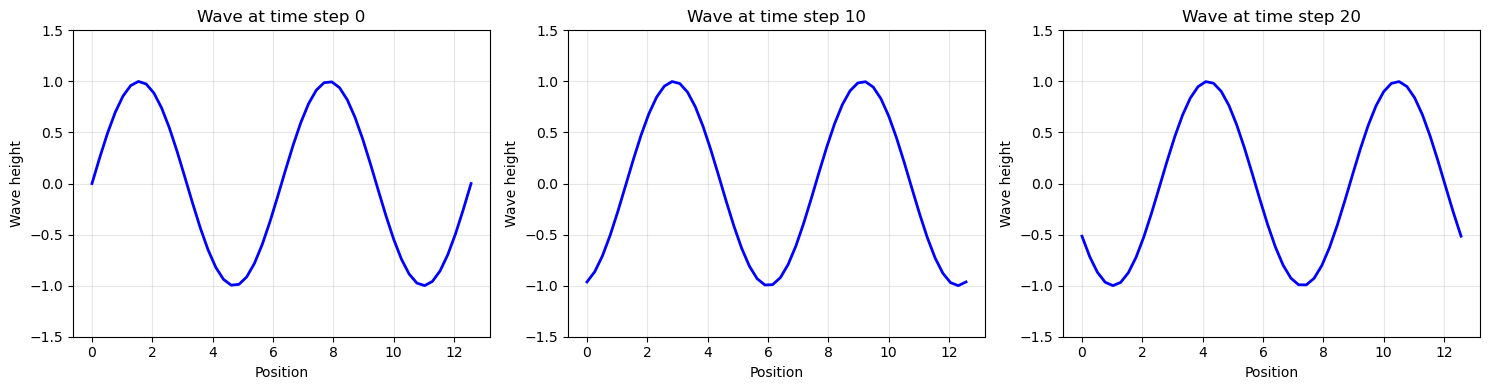

In [3]:
def plot_wave_snapshots(x, t, wave_data, snapshot_times=[0, 10, 20]):
    """
    Show the wave at different moments in time, like taking photographs
    of a wave at different moments.
    """
    fig, axes = plt.subplots(1, len(snapshot_times), figsize=(15, 4))

    for i, time_idx in enumerate(snapshot_times):
        axes[i].plot(x, wave_data[time_idx, :], "b-", linewidth=2)
        axes[i].set_title(f"Wave at time step {time_idx}")
        axes[i].set_xlabel("Position")
        axes[i].set_ylabel("Wave height")
        axes[i].grid(True, alpha=0.3)
        axes[i].set_ylim(-1.5, 1.5)

    plt.tight_layout()
    plt.show()


# Show our wave at three different moments
plot_wave_snapshots(x_positions, time_moments, wave_pattern)

### The Big Picture View: Space-Time Diagrams

Now let's look at the entire pattern all at once. This type of visualization shows us how the pattern changes over both space AND time simultaneously.

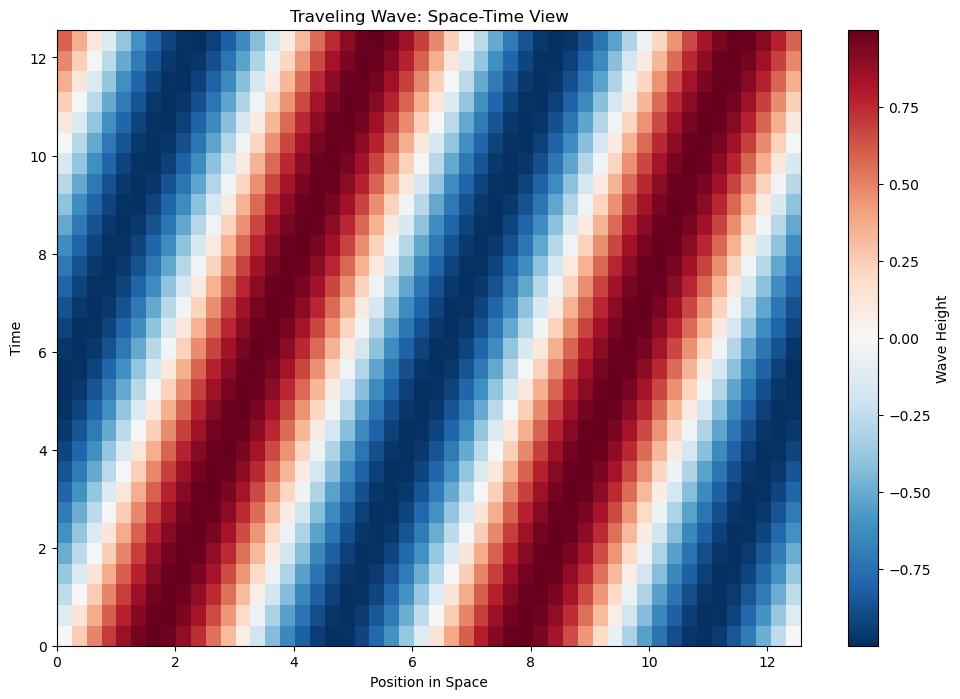

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Traveling Wave: Space-Time View'}, xlabel='Position in Space', ylabel='Time'>)

In [4]:
def plot_spacetime_pattern(x, t, data, title="Pattern in Space and Time"):
    """
    Create a 'bird's eye view' of how our pattern changes.
    - x-axis: position in space
    - y-axis: time
    - colors: the value of our pattern (wave height)
    """
    fig, ax = plt.subplots(figsize=(12, 8))

    # Create the space-time plot
    im = ax.imshow(
        data,
        aspect="auto",
        origin="lower",
        extent=[x[0], x[-1], t[0], t[-1]],
        cmap="RdBu_r",
    )

    ax.set_xlabel("Position in Space")
    ax.set_ylabel("Time")
    ax.set_title(title)

    # Add colorbar to show what the colors mean
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label("Wave Height")

    plt.show()
    return fig, ax


# Visualize our traveling wave pattern
plot_spacetime_pattern(
    x_positions, time_moments, wave_pattern, "Traveling Wave: Space-Time View"
)

**🤔 Think About It:** 
In the space-time diagram above, can you see the diagonal stripes? These show the wave moving from left to right over time. The slope of these stripes tells us the wave's speed!

---

## Part 2: More Complex Patterns - Multiple Waves Interacting

Real-world phenomena rarely consist of just one simple pattern. Usually, multiple patterns occur simultaneously and interact with each other. Let's explore this concept.

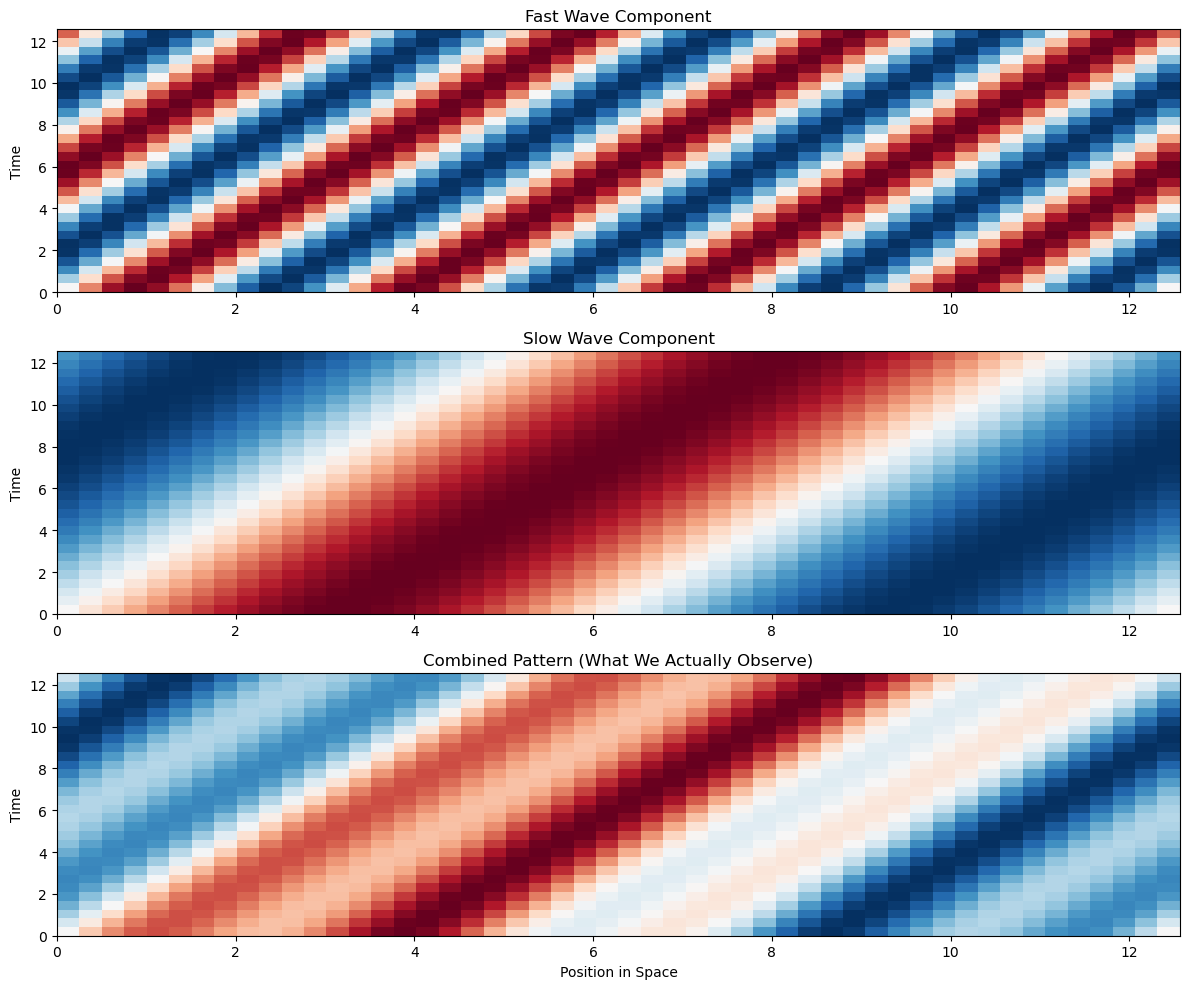

In [5]:
def create_multiple_wave_pattern(x_points=50, time_steps=30):
    """
    Create a pattern with TWO different waves:
    1. A fast-moving wave (like wind ripples)
    2. A slow-moving wave (like ocean swells)

    This mimics how real phenomena often have multiple patterns
    happening at the same time.
    """
    x = np.linspace(0, 4 * np.pi, x_points)
    t = np.linspace(0, 4 * np.pi, time_steps)

    # Initialize arrays for our different wave components
    fast_wave = np.zeros((time_steps, x_points))
    slow_wave = np.zeros((time_steps, x_points))
    combined_pattern = np.zeros((time_steps, x_points))

    for i, time_moment in enumerate(t):
        # Fast wave: moves quickly, smaller wavelength
        fast_wave[i, :] = 0.5 * np.sin(2 * x - 0.8 * time_moment)

        # Slow wave: moves slowly, larger wavelength
        slow_wave[i, :] = 1.0 * np.sin(0.5 * x - 0.2 * time_moment)

        # Combined pattern: what we actually observe
        combined_pattern[i, :] = fast_wave[i, :] + slow_wave[i, :]

    return x, t, fast_wave, slow_wave, combined_pattern


# Create our multi-wave pattern
x, t, fast, slow, combined = create_multiple_wave_pattern()

# Show all three patterns
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Fast wave
im1 = axes[0].imshow(
    fast,
    aspect="auto",
    origin="lower",
    extent=[x[0], x[-1], t[0], t[-1]],
    cmap="RdBu_r",
)
axes[0].set_title("Fast Wave Component")
axes[0].set_ylabel("Time")

# Slow wave
im2 = axes[1].imshow(
    slow,
    aspect="auto",
    origin="lower",
    extent=[x[0], x[-1], t[0], t[-1]],
    cmap="RdBu_r",
)
axes[1].set_title("Slow Wave Component")
axes[1].set_ylabel("Time")

# Combined pattern
im3 = axes[2].imshow(
    combined,
    aspect="auto",
    origin="lower",
    extent=[x[0], x[-1], t[0], t[-1]],
    cmap="RdBu_r",
)
axes[2].set_title("Combined Pattern (What We Actually Observe)")
axes[2].set_xlabel("Position in Space")
axes[2].set_ylabel("Time")

plt.tight_layout()
plt.show()

### The Central Question: Can We Find the Hidden Components?

Here's the fascinating challenge that scientists face every day: **Given only the combined pattern (what we observe), can we discover the individual components that created it?**

This is exactly what EOF analysis helps us do! Let's see how well we can separate our known components.

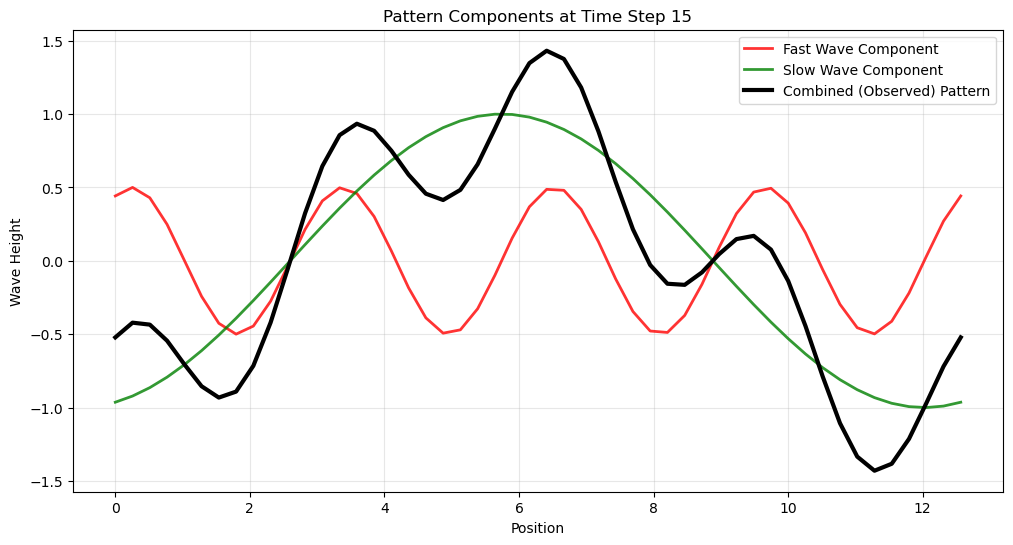

In [6]:
def compare_patterns_at_timepoint(x, fast, slow, combined, time_idx=15):
    """
    Compare the individual components with the combined pattern
    at a specific moment in time.
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot all three patterns at the same time point
    ax.plot(
        x,
        fast[time_idx, :],
        "r-",
        linewidth=2,
        label="Fast Wave Component",
        alpha=0.8,
    )
    ax.plot(
        x,
        slow[time_idx, :],
        "g-",
        linewidth=2,
        label="Slow Wave Component",
        alpha=0.8,
    )
    ax.plot(
        x,
        combined[time_idx, :],
        "k-",
        linewidth=3,
        label="Combined (Observed) Pattern",
    )

    ax.set_xlabel("Position")
    ax.set_ylabel("Wave Height")
    ax.set_title(f"Pattern Components at Time Step {time_idx}")
    ax.legend()
    ax.grid(True, alpha=0.3)

    plt.show()


# Compare patterns at a specific time
compare_patterns_at_timepoint(x, fast, slow, combined)

**🎯 Key Insight:** 
In real science, we only get to see the black line (the combined pattern). The red and green lines represent the "hidden" components that we want to discover. EOF analysis is like having X-ray vision that lets us see through the complexity to find these underlying patterns!

---

## Part 3: Real-World Connection - Temperature Patterns

Let's create a more realistic example using something everyone understands: temperature patterns across different locations.

In [7]:
def create_temperature_pattern(n_locations=20, n_days=60, seed=42):
    """
    Simulate temperature data for multiple cities over time.
    This mimics real climate data where different regions
    experience correlated temperature changes.

    We'll create two main patterns:
    1. Seasonal variation (affects all locations similarly)
    2. Regional weather systems (affects nearby locations together)
    """
    np.random.seed(seed)  # For reproducible results

    # Create location coordinates (imagine cities along a line)
    locations = np.linspace(0, 100, n_locations)  # Distance in "km"
    days = np.arange(n_days)

    # Pattern 1: Seasonal temperature change (affects everyone)
    seasonal_cycle = 10 * np.sin(2 * np.pi * days / 30)  # 30-day cycle

    # Pattern 2: Weather systems moving across region
    weather_systems = np.zeros((n_days, n_locations))
    for day in range(n_days):
        # Create a "warm front" that moves across the region
        center = 20 + 0.5 * day  # Front moves at 0.5 km/day
        width = 15  # Width of the weather system

        # Temperature anomaly caused by this weather system
        for i, loc in enumerate(locations):
            distance_from_center = abs(loc - center)
            if distance_from_center < width:
                # Closer to center = warmer
                weather_systems[day, i] = 5 * np.exp(
                    -((distance_from_center / width) ** 2)
                )

    # Combine patterns to create realistic temperature data
    temperature_data = np.zeros((n_days, n_locations))

    for day in range(n_days):
        for loc in range(n_locations):
            # Base temperature + seasonal + weather system + noise
            temperature_data[day, loc] = (
                20  # Base temperature
                + seasonal_cycle[day]  # Seasonal variation
                + weather_systems[day, loc]  # Weather systems
                + np.random.normal(0, 1)
            )  # Random noise

    return locations, days, temperature_data, seasonal_cycle, weather_systems


# Create our temperature dataset
locations, days, temps, seasonal, weather = create_temperature_pattern()

print(
    f"Created temperature data for {len(locations)} locations over {len(days)} days"
)
print(f"Data shape: {temps.shape} (days × locations)")

Created temperature data for 20 locations over 60 days
Data shape: (60, 20) (days × locations)


Now let's visualize this temperature data:

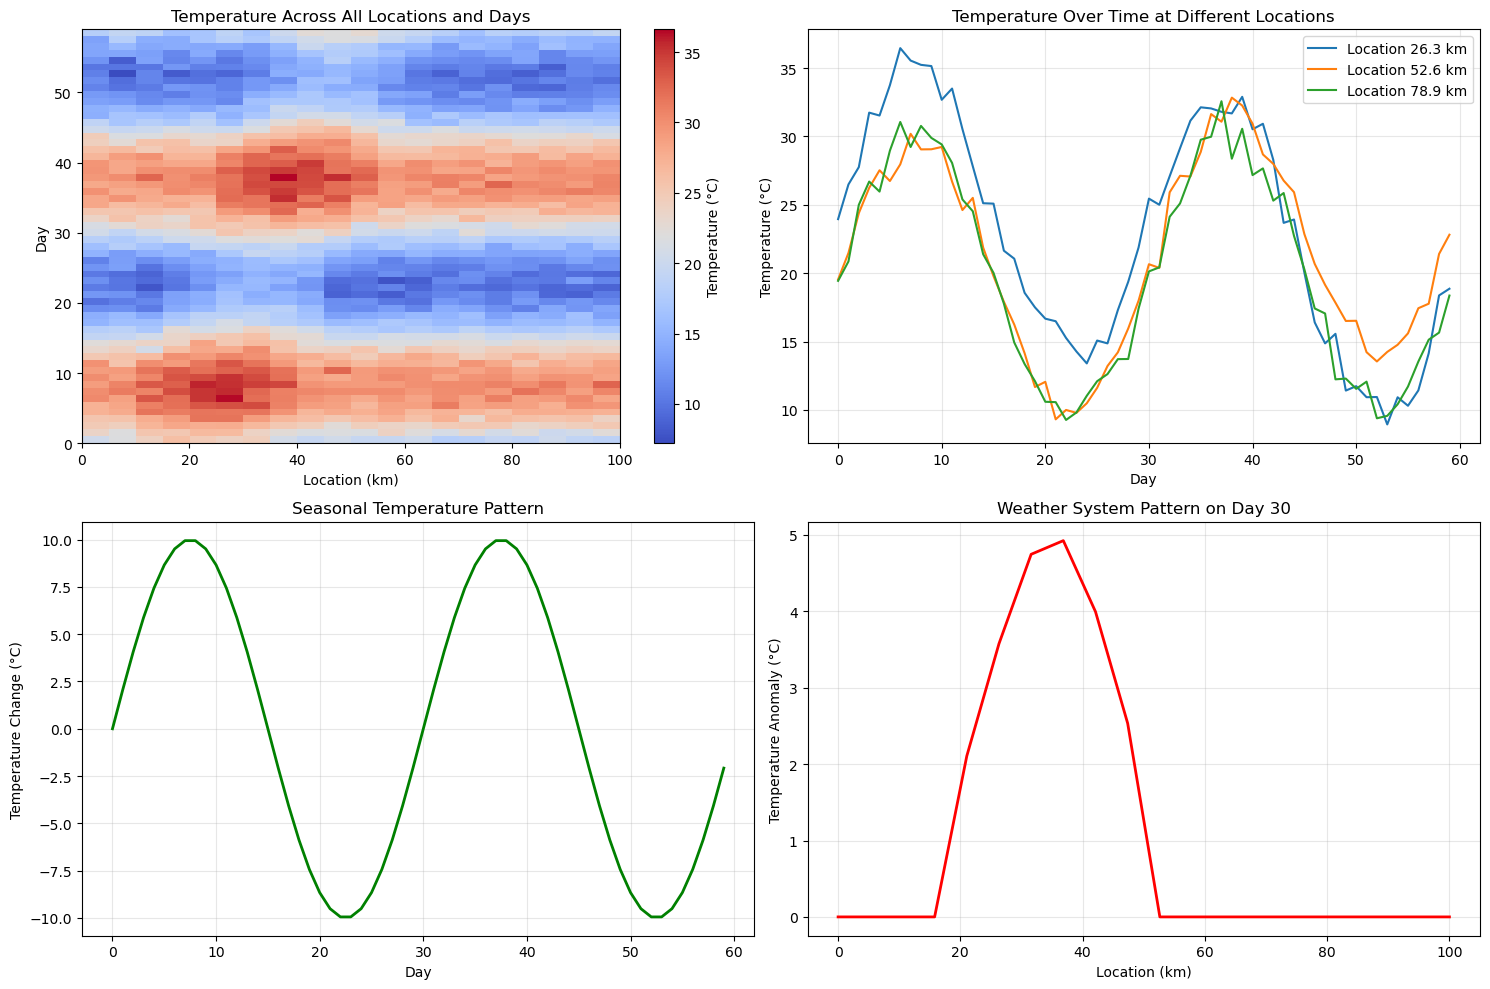

In [8]:
# Visualize the temperature patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Temperature map over space and time
im1 = axes[0, 0].imshow(
    temps,
    aspect="auto",
    origin="lower",
    extent=[locations[0], locations[-1], days[0], days[-1]],
    cmap="coolwarm",
)
axes[0, 0].set_title("Temperature Across All Locations and Days")
axes[0, 0].set_xlabel("Location (km)")
axes[0, 0].set_ylabel("Day")
plt.colorbar(im1, ax=axes[0, 0], label="Temperature (°C)")

# 2. Temperature at a few specific locations over time
for i, loc_idx in enumerate([5, 10, 15]):
    axes[0, 1].plot(
        days, temps[:, loc_idx], label=f"Location {locations[loc_idx]:.1f} km"
    )
axes[0, 1].set_title("Temperature Over Time at Different Locations")
axes[0, 1].set_xlabel("Day")
axes[0, 1].set_ylabel("Temperature (°C)")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Seasonal pattern (affects all locations)
axes[1, 0].plot(days, seasonal, "g-", linewidth=2)
axes[1, 0].set_title("Seasonal Temperature Pattern")
axes[1, 0].set_xlabel("Day")
axes[1, 0].set_ylabel("Temperature Change (°C)")
axes[1, 0].grid(True, alpha=0.3)

# 4. Weather system pattern at a specific day
day_to_show = 30
axes[1, 1].plot(locations, weather[day_to_show, :], "r-", linewidth=2)
axes[1, 1].set_title(f"Weather System Pattern on Day {day_to_show}")
axes[1, 1].set_xlabel("Location (km)")
axes[1, 1].set_ylabel("Temperature Anomaly (°C)")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### The Challenge: Finding Patterns in Real Data

Now we have data that looks much more like what scientists actually work with. If you look at the temperature map in the top-left plot, you can see it's quite complex. There are patterns, but they're not as obvious as our simple wave examples.

**The big questions:**
1. Can we automatically identify the main patterns in this data?
2. How much of the temperature variation is due to seasonal effects vs. weather systems?
3. Are there other patterns we haven't noticed?


Overall Statistics:
  Average temperature: 21.1°C
  Total temperature variance: 53.98
  Most variable location: 26.3 km
  Least variable location: 42.1 km


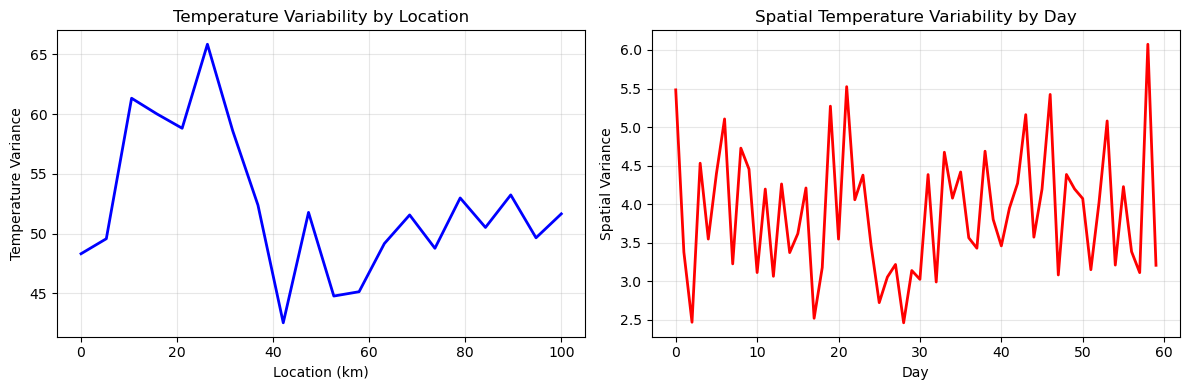

In [9]:
def analyze_temperature_variability(temps, locations, days):
    """
    Let's do some basic analysis to understand our temperature data.
    This sets the stage for more sophisticated pattern-finding methods.
    """
    # Calculate basic statistics
    mean_temp = np.mean(temps)
    total_variance = np.var(temps)

    # How much does temperature vary at each location?
    location_variance = np.var(
        temps, axis=0
    )  # Variance over time for each location

    # How much does the spatial pattern vary each day?
    daily_variance = np.var(
        temps, axis=1
    )  # Variance across locations for each day

    print(f"Overall Statistics:")
    print(f"  Average temperature: {mean_temp:.1f}°C")
    print(f"  Total temperature variance: {total_variance:.2f}")
    print(
        f"  Most variable location: {locations[np.argmax(location_variance)]:.1f} km"
    )
    print(
        f"  Least variable location: {locations[np.argmin(location_variance)]:.1f} km"
    )

    # Plot the variability patterns
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Variance at each location
    axes[0].plot(locations, location_variance, "b-", linewidth=2)
    axes[0].set_title("Temperature Variability by Location")
    axes[0].set_xlabel("Location (km)")
    axes[0].set_ylabel("Temperature Variance")
    axes[0].grid(True, alpha=0.3)

    # Variance on each day
    axes[1].plot(days, daily_variance, "r-", linewidth=2)
    axes[1].set_title("Spatial Temperature Variability by Day")
    axes[1].set_xlabel("Day")
    axes[1].set_ylabel("Spatial Variance")
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return location_variance, daily_variance


# Analyze our temperature data
loc_var, day_var = analyze_temperature_variability(temps, locations, days)

## Part 4: The Foundation for Pattern Discovery

Before we dive into the mathematical techniques for finding patterns, let's establish the key concepts that make pattern discovery possible.

### Concept 1: Removing the Average (Finding Anomalies)

One of the most important steps in pattern analysis is removing the average. This helps us focus on the variations rather than the baseline values.

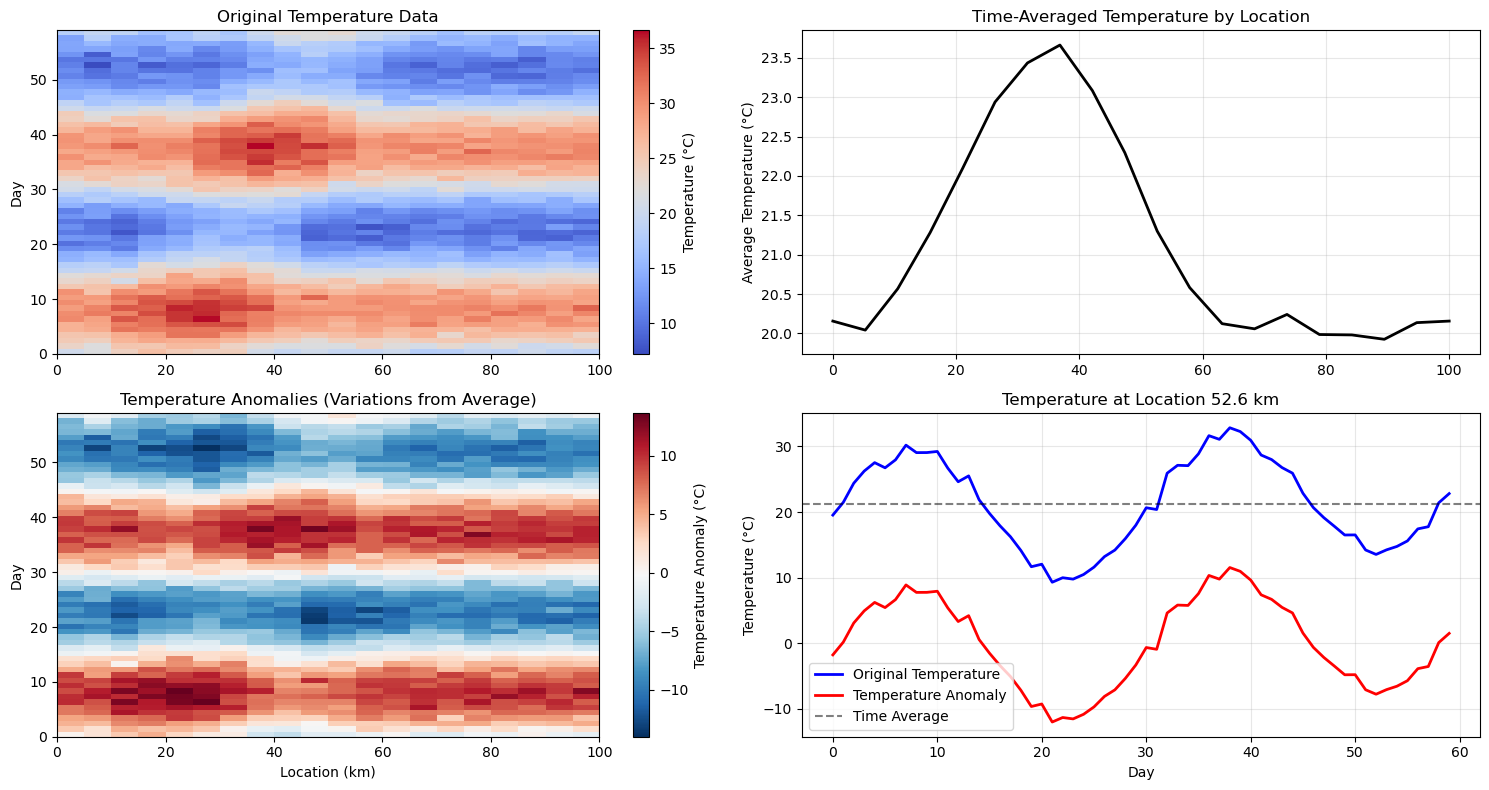

🔍 Key Insight:
By looking at anomalies instead of raw temperatures, we can focus on the
patterns of change rather than absolute values. This makes it much easier
to identify the underlying modes of variability!


In [10]:
def demonstrate_anomaly_calculation(temps):
    """
    Show why removing the average is crucial for pattern analysis.
    """
    # Calculate the time-averaged temperature at each location
    time_mean = np.mean(temps, axis=0)  # Average over all days

    # Calculate anomalies (deviations from the average)
    temp_anomalies = temps - time_mean[None, :]  # Subtract mean from each day

    # Create comparison plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))

    # Original data
    im1 = axes[0, 0].imshow(
        temps,
        aspect="auto",
        origin="lower",
        cmap="coolwarm",
        extent=[locations[0], locations[-1], days[0], days[-1]],
    )
    axes[0, 0].set_title("Original Temperature Data")
    axes[0, 0].set_ylabel("Day")
    plt.colorbar(im1, ax=axes[0, 0], label="Temperature (°C)")

    # Time-averaged pattern
    axes[0, 1].plot(locations, time_mean, "k-", linewidth=2)
    axes[0, 1].set_title("Time-Averaged Temperature by Location")
    axes[0, 1].set_ylabel("Average Temperature (°C)")
    axes[0, 1].grid(True, alpha=0.3)

    # Anomalies (variations from average)
    im2 = axes[1, 0].imshow(
        temp_anomalies,
        aspect="auto",
        origin="lower",
        cmap="RdBu_r",
        extent=[locations[0], locations[-1], days[0], days[-1]],
    )
    axes[1, 0].set_title("Temperature Anomalies (Variations from Average)")
    axes[1, 0].set_xlabel("Location (km)")
    axes[1, 0].set_ylabel("Day")
    plt.colorbar(im2, ax=axes[1, 0], label="Temperature Anomaly (°C)")

    # Compare original vs anomaly time series for one location
    loc_idx = 10
    axes[1, 1].plot(
        days, temps[:, loc_idx], "b-", label="Original Temperature", linewidth=2
    )
    axes[1, 1].plot(
        days,
        temp_anomalies[:, loc_idx],
        "r-",
        label="Temperature Anomaly",
        linewidth=2,
    )
    axes[1, 1].axhline(
        y=time_mean[loc_idx],
        color="k",
        linestyle="--",
        alpha=0.5,
        label="Time Average",
    )
    axes[1, 1].set_title(f"Temperature at Location {locations[loc_idx]:.1f} km")
    axes[1, 1].set_xlabel("Day")
    axes[1, 1].set_ylabel("Temperature (°C)")
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("🔍 Key Insight:")
    print(
        "By looking at anomalies instead of raw temperatures, we can focus on the"
    )
    print(
        "patterns of change rather than absolute values. This makes it much easier"
    )
    print("to identify the underlying modes of variability!")

    return temp_anomalies


# Demonstrate anomaly calculation
temp_anomalies = demonstrate_anomaly_calculation(temps)

### Concept 2: Thinking About Data Shape and Structure

Understanding how we organize our data is crucial for pattern analysis. Let's explore the structure of spatiotemporal data.

📊 Understanding Our Data Structure:
Data shape: (60, 20)
  - 60 time steps (days)
  - 20 spatial points (locations)
  - Total data points: 1200

🤔 Different Ways to Think About This Data:
1. As 60 snapshots of temperature across 20 locations
2. As 20 time series, each with 60 measurements
3. As a matrix where each number represents temperature at a specific place and time



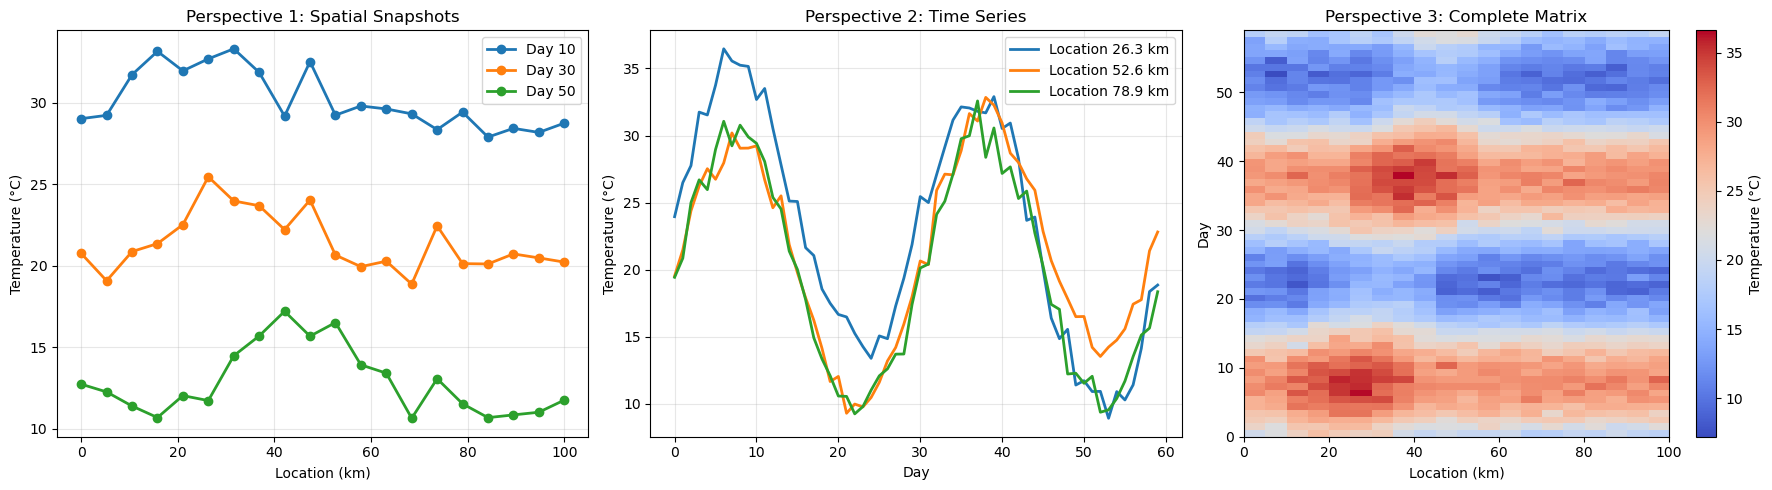

🎯 Why This Matters:
Pattern-finding algorithms need to understand these relationships.
They look for ways that changes in space are related to changes in time.


In [11]:
def explain_data_structure(temps):
    """
    Help students understand how spatiotemporal data is organized
    and why this matters for pattern analysis.
    """
    n_days, n_locations = temps.shape

    print("📊 Understanding Our Data Structure:")
    print(f"Data shape: {temps.shape}")
    print(f"  - {n_days} time steps (days)")
    print(f"  - {n_locations} spatial points (locations)")
    print(f"  - Total data points: {n_days * n_locations}")
    print()

    print("🤔 Different Ways to Think About This Data:")
    print(
        f"1. As {n_days} snapshots of temperature across {n_locations} locations"
    )
    print(f"2. As {n_locations} time series, each with {n_days} measurements")
    print(
        f"3. As a matrix where each number represents temperature at a specific place and time"
    )
    print()

    # Visualize these different perspectives
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # Perspective 1: Spatial snapshots at different times
    times_to_show = [10, 30, 50]
    for i, day in enumerate(times_to_show):
        if i == 0:
            axes[0].plot(
                locations, temps[day, :], "-o", label=f"Day {day}", linewidth=2
            )
        else:
            axes[0].plot(
                locations, temps[day, :], "-o", label=f"Day {day}", linewidth=2
            )
    axes[0].set_title("Perspective 1: Spatial Snapshots")
    axes[0].set_xlabel("Location (km)")
    axes[0].set_ylabel("Temperature (°C)")
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Perspective 2: Time series at different locations
    locs_to_show = [5, 10, 15]
    for i, loc in enumerate(locs_to_show):
        axes[1].plot(
            days,
            temps[:, loc],
            "-",
            label=f"Location {locations[loc]:.1f} km",
            linewidth=2,
        )
    axes[1].set_title("Perspective 2: Time Series")
    axes[1].set_xlabel("Day")
    axes[1].set_ylabel("Temperature (°C)")
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    # Perspective 3: Matrix view
    im = axes[2].imshow(
        temps,
        aspect="auto",
        origin="lower",
        cmap="coolwarm",
        extent=[locations[0], locations[-1], days[0], days[-1]],
    )
    axes[2].set_title("Perspective 3: Complete Matrix")
    axes[2].set_xlabel("Location (km)")
    axes[2].set_ylabel("Day")
    plt.colorbar(im, ax=axes[2], label="Temperature (°C)")

    plt.tight_layout()
    plt.show()

    print("🎯 Why This Matters:")
    print("Pattern-finding algorithms need to understand these relationships.")
    print(
        "They look for ways that changes in space are related to changes in time."
    )


# Explain the data structure
explain_data_structure(temps)

## Summary: What We've Discovered

Congratulations! You've now seen the fundamental concepts that make pattern discovery possible. Let's recap what we've learned:

### 🔑 Key Concepts We've Explored:

1. **Spatiotemporal Patterns**: Data that changes over both space and time contains hidden patterns that repeat and interact.

2. **Pattern Separation**: Complex-looking data often results from simpler patterns combined together.

3. **Anomalies Matter**: By removing averages, we focus on variations that reveal the underlying patterns.

4. **Data Structure**: How we organize our data affects how we can analyze patterns within it.

### 🎯 The Big Picture:

We started with simple traveling waves and built up to realistic temperature data. Along the way, we discovered that:
- Even complex data contains recognizable patterns
- Multiple patterns can occur simultaneously
- Mathematical tools can help us separate these patterns
- Visualization is crucial for understanding what's happening

### 🚀 What's Next:

In the next notebook, we'll learn how to build mathematical tools that can automatically find these patterns for us. We'll discover how techniques like Singular Value Decomposition (SVD) can act like a "pattern detective" that reveals the hidden structure in our data.

**Preview Question**: Now that we've seen how patterns hide within complex data, how do you think we could write a computer program to automatically find these patterns without knowing what to look for in advance?

🎮 Try This Challenge:
Modify the parameters below and run the cell to see how different
settings create different patterns:


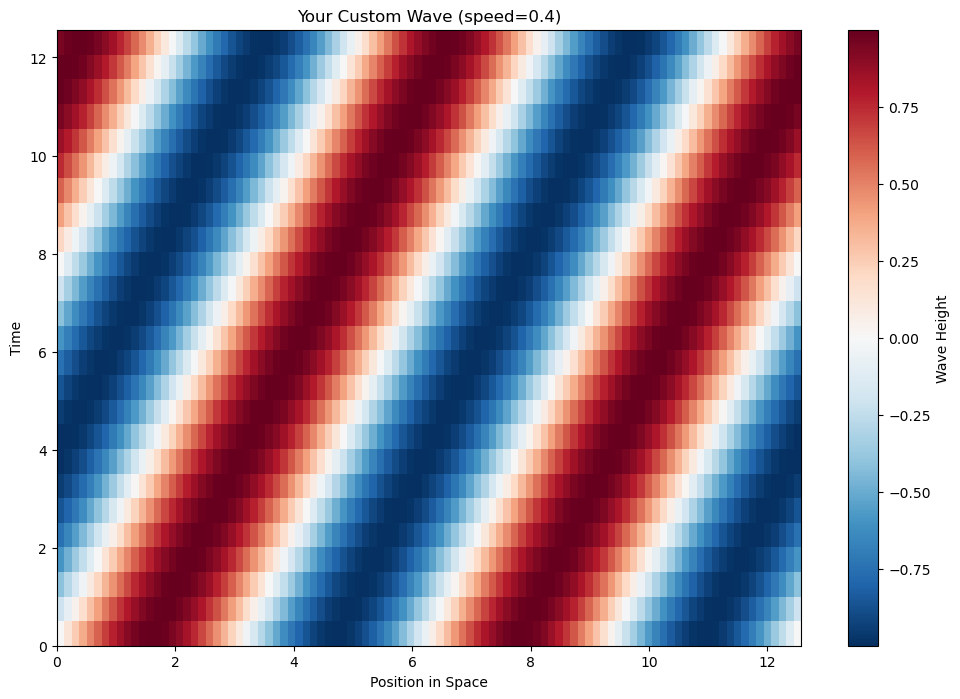

Created pattern with 100 spatial points and 25 time steps
Try changing the parameters above and running this cell again!


In [12]:
# Final challenge: Try modifying the parameters below and see how it affects the patterns!
print("🎮 Try This Challenge:")
print("Modify the parameters below and run the cell to see how different")
print("settings create different patterns:")

# Experiment with these parameters
x_pts = 100  # Number of spatial points
t_pts = 25  # Number of time steps
wave_spd = 0.4  # Speed of the traveling wave

# Create and visualize your custom pattern
x_exp, t_exp, wave_exp = create_traveling_wave(x_pts, t_pts, wave_spd)
plot_spacetime_pattern(
    x_exp, t_exp, wave_exp, f"Your Custom Wave (speed={wave_spd})"
)

print(f"Created pattern with {x_pts} spatial points and {t_pts} time steps")
print("Try changing the parameters above and running this cell again!")